# What makes a pokemon lengendary?

<img src="./legends.jpg">


#### An analysis of legendary pokemon from Gen I to Gen VII (Because finding a Gen VIII Dataset was impossible)
By: Sharif Uzzell

## Introduction:

Have you ever been in the middle of a pleasant and casual pokemon battle with a friend? Everything is going well. You're using your favorite pokemon Blaziken with Speed Boost because he is OP. You see vistory in sight when suddenly your friend throws out their Registeel which should get completely demolished because Steel is weak against Fire type and yet you are annihilated with ease. Why did that happen you ask? You know Registeel is legendary but should that really merit it being above the laws of nature? More importantly what makes Registeel so great? What makes any legendary so great? Is it arbitrary? Why aren't cool pokemon like blaziken given the legendary status? 

Using data on 802 pokemon from Pokemon Generations 1-7 scraped from serebii.net and compiled on kaggle.com by Rounak Banik we will train a Random Forest Classifier to determine which Pokemon features are most influential in classifying a Pokemon as Legendary.  



### Outline

1. Getting Started
    * 1.1 Required Libraries
    * 1.2 Raw Data
2. Exploring Legendary Stats
    * 2.1 Type Distributions Legendary Vs. General Pop.
    * 2.2 Exploring Fighting Stats
3. Pokemon Types: Potential Clue?
    * 3.1 Exploring Psychic type pokemon
4. Predict Key Characteristics before Random Forests
    * 4.1 Null Hypothesis
5. Random Forests
    * 5.1 Optimizing Hyperparameters
    * 5.2 Creating our RandomForest
    * 5.3 Accuracy
    * 5.4 Results
6. Conclusion
    * 6.1 Key Characteristics
    * 6.2 Concluding thoughts


## 1. Getting Started

### 1.1 Required Libraries
   * Pandas: for data ingestion and organization
   * Matplotlib: for data visualization 
   * Scikit-learn: for creating, testing, and training Random Forest 
   * Numpy: for array data manipulation and statistics
   
### 1.2 Required Libraries
   Below we can see how we collected our Raw data that we will be working with for the rest of this project. The data was taken from Kaggle. Follow this link to download a copy of this dataset for yourself. 
   https://www.kaggle.com/rounakbanik/pokemon
   
   Usually for a datascience project one would have to clean and prepare the data for Exploratory Data Analysis and Machine Learning but this dataset is relatively clean for our purposes and will require no such preparation.

In [101]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.datasets import make_classification
df = pd.read_csv('./pokemon.csv')
df

,abilities,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,...,percentage_male,pokedex_number,sp_attack,sp_defense,speed,type1,type2,weight_kg,generation,is_legendary
0,"['Overgrow', 'Chlorophyll']",1.00,1.0,1.0,0.5,0.5,0.50,2.00,2.00,1.0,...,88.1,1,65,65,45,grass,poison,6.9,1,0
1,"['Overgrow', 'Chlorophyll']",1.00,1.0,1.0,0.5,0.5,0.50,2.00,2.00,1.0,...,88.1,2,80,80,60,grass,poison,13.0,1,0
2,"['Overgrow', 'Chlorophyll']",1.00,1.0,1.0,0.5,0.5,0.50,2.00,2.00,1.0,...,88.1,3,122,120,80,grass,poison,100.0,1,0
3,"['Blaze', 'Solar Power']",0.50,1.0,1.0,1.0,0.5,1.00,0.50,1.00,1.0,...,88.1,4,60,50,65,fire,NaN,8.5,1,0
4,"['Blaze', 'Solar Power']",0.50,1.0,1.0,1.0,0.5,1.00,0.50,1.00,1.0,...,88.1,5,80,65,80,fire,NaN,19.0,1,0
5,"['Blaze', 'Solar Power']",0.25,1.0,1.0,2.0,0.5,0.50,0.50,1.00,1.0,...,88.1,6,159,115,100,fire,flying,90.5,1,0
6,"['Torrent', 'Rain Dish']",1.00,1.0,1.0,2.0,1.0,1.00,0.50,1.00,1.0,...,88.1,7,50,64,43,water,NaN,9.0,1,0
7,"['Torrent', 'Rain Dish']",1.00,1.0,1.0,2.0,1.0,1.00,0.50,1.00,1.0,...,88.1,8,65,80,58,water,NaN,22.5,1,0
8,"['Torrent', 'Rain Dish']",1.00,1.0,1.0,2.0,1.0,1.00,0.50,1.00,1.0,...,88.1,9,135,115,78,water,NaN,85.5,1,0
9,"['Shield Dust', 'Run Away']",1.00,1.0,1.0,1.0,1.0,0.50,2.00,2.00,1.0,...,50.0,10,20,20,45,bug,NaN,2.9,1,0


## 2. Exploring Legendary Stats

   ### 2.1 Type Distributions Legendary Vs General Pop. 
   
       By looking at the type distributions of Legendary Pokemon vs the general population we can gain insight into what defining characteristics of said type may influence the Legendary status of pokemon. However, before we do this, let's see if we can do a more in-depth analysis of pokemon by taking a look at their fighting stats. 

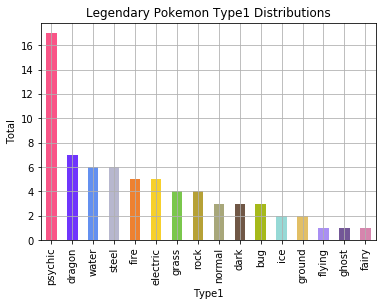

Total Legendaries: 70


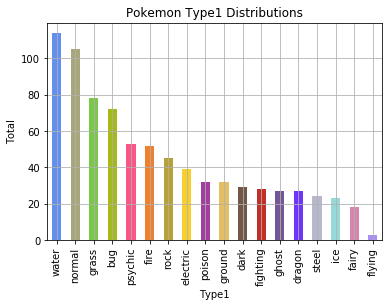

Total Number of Pokemon: 801


In [130]:
legends = df[df['is_legendary'] == 1]
legends
Number_of_legendaries, _ = legends.shape
my_colors = ['#F95587','#6F35FC','#6390F0','#B7B7CE','#EE8130','#F7D02C','#7AC74C','#B6A136','#A8A77A','#705746','#A6B91A', '#96D9D6','#E2BF65','#A98FF3','#735797','#D685AD']

legends['type1'].value_counts().plot(kind='bar', color=my_colors)
plt.ylabel("Total")
plt.xlabel("Type1")
plt.grid(True)
plt.title("Legendary Pokemon Type1 Distributions")
plt.show()

print("Total Legendaries: " + str(Number_of_legendaries))
my_colors = ['#6390F0','#A8A77A','#7AC74C','#A6B91A','#F95587','#EE8130','#B6A136','#F7D02C','#A33EA1','#E2BF65','#705746', '#C22E28','#735797','#6F35FC','#B7B7CE','#96D9D6', '#D685AD', '#A98FF3']
df['type1'].value_counts().plot(kind='bar', color=my_colors)
plt.ylabel("Total")
plt.xlabel("Type1")
plt.grid(True)
plt.title("Pokemon Type1 Distributions")
plt.show()
Number_of_Pokemon, _ = df.shape
print("Total Number of Pokemon: "  + str(Number_of_Pokemon))


   
### 2.2 Exploring Fightng Stats: Legendary Vs General Pop. 

#### Let's try visualizing some more characteristics of legenderies
By visualizing various characteristics of legenderies we can make some initial predictions of what we think will be the most influential traits that determine a pokemon's legendary status. We'll look at Pokemon types later as they are a broader category that doesn't offer any immediately usefule information. 

#### Legendary HP vs General HP Distribution

HP Histograms


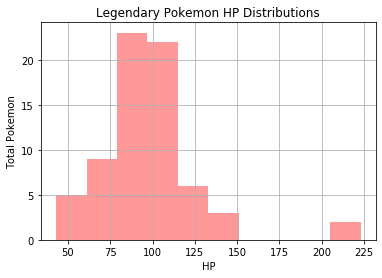

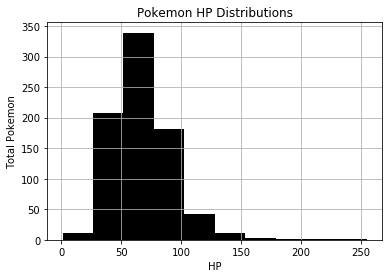

Attack Histograms


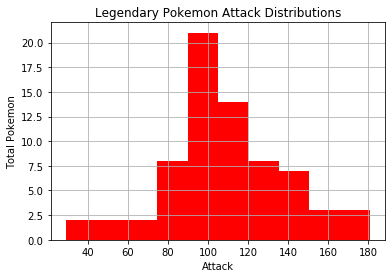

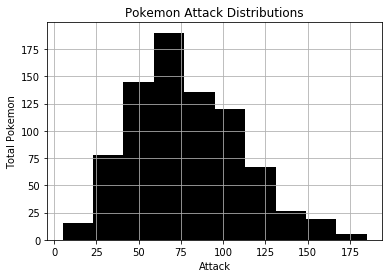

Defense Histograms


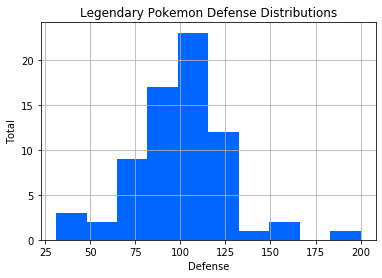

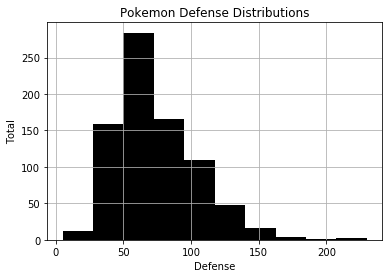

Special Attack Histograms


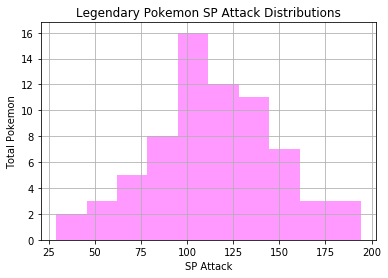

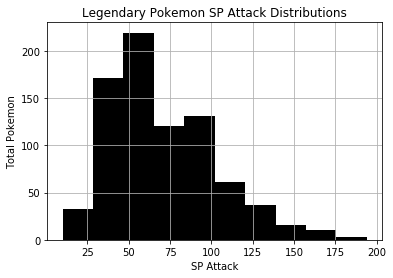

Special Defense Histograms


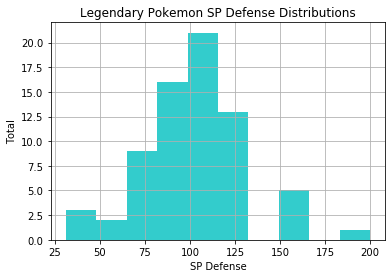

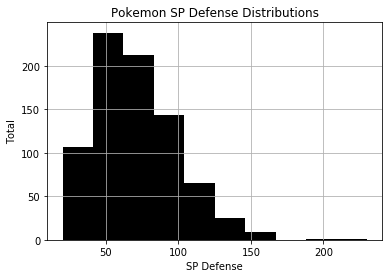

Speed Histograms


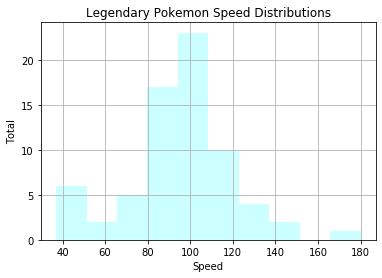

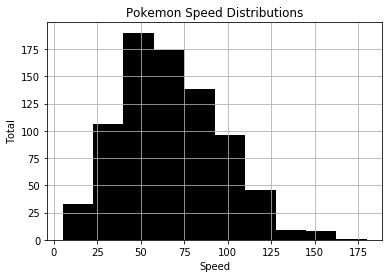

In [136]:
print("HP Histograms")
ax = plt.hist(legends['hp'], color='#ff9999')
plt.ylabel("Total Pokemon")
plt.xlabel("HP")
plt.grid(True)
plt.title("Legendary Pokemon HP Distributions")
plt.show()
ax = plt.hist(df['hp'], color='#000000')
plt.ylabel("Total Pokemon")
plt.xlabel("HP")
plt.grid(True)
plt.title("Pokemon HP Distributions")
plt.show()

print("Attack Histograms")
ax = plt.hist(legends['attack'], color='r')
plt.ylabel("Total Pokemon")
plt.xlabel("Attack")
plt.grid(True)
plt.title("Legendary Pokemon Attack Distributions")
plt.show()
ax = plt.hist(df['attack'], color='#000000')
plt.ylabel("Total Pokemon")
plt.xlabel("Attack")
plt.grid(True)
plt.title("Pokemon Attack Distributions")
plt.show()

print("Defense Histograms")
ax = plt.hist(legends['defense'], color='#0066ff')
plt.ylabel("Total")
plt.xlabel("Defense")
plt.grid(True)
plt.title("Legendary Pokemon Defense Distributions")
plt.show()
ax = plt.hist(df['defense'], color='#000000')
plt.ylabel("Total")
plt.xlabel("Defense")
plt.grid(True)
plt.title("Pokemon Defense Distributions")
plt.show()

print("Special Attack Histograms")
ax = plt.hist(legends['sp_attack'], color='#ff99ff')
plt.ylabel("Total Pokemon")
plt.xlabel("SP Attack")
plt.grid(True)
plt.title("Legendary Pokemon SP Attack Distributions")
plt.show()
ax = plt.hist(df['sp_attack'], color='#000000')
plt.ylabel("Total Pokemon")
plt.xlabel("SP Attack")
plt.grid(True)
plt.title("Legendary Pokemon SP Attack Distributions")
plt.show()

print("Special Defense Histograms")
ax = plt.hist(legends['sp_defense'], color='#33cccc')
plt.ylabel("Total")
plt.xlabel("SP Defense")
plt.grid(True)
plt.title("Legendary Pokemon SP Defense Distributions")
plt.show()
ax = plt.hist(df['sp_defense'], color='#000000')
plt.ylabel("Total")
plt.xlabel("SP Defense")
plt.grid(True)
plt.title("Pokemon SP Defense Distributions")
plt.show()

print("Speed Histograms")
ax = plt.hist(legends['speed'], color='#ccffff')
plt.ylabel("Total")
plt.xlabel("Speed")
plt.grid(True)
plt.title("Legendary Pokemon Speed Distributions")
plt.show()
ax = plt.hist(df['speed'], color='#000000')
plt.ylabel("Total")
plt.xlabel("Speed")
plt.grid(True)
plt.title("Pokemon Speed Distributions")
plt.show()

### Summarizing the above charts 
When we observe the charts above we can see the key differences between your average pokemon and a legendary. Moving down the list we can see that legendaries are above average across all categories that would influence your average pokemon battle. But which one is the most influential in determining if a pokemon is deserving of the "Legendary" status? Let's examine the charts we have made thus far.

For HP, legendaries lie between about 80 and 120 while your average pokemon lie between 50 to 75 HP.
For Attack, legendaries are between 90 and 120 while all pokemon in general are between 55 and 65.
For Defense, legendaries are between 80 and 120 while other pokemon are between 50 and 75.
For Special Attack, in legendaries their SP Attack can be from 100 to 125, For all pokemon in general SP Attack can be anywhere from 25 to 100
For Special Defense, legendaries have their stats anywhere between 75 to 125 and regular pokemon are at 50 to 100
Finally, for Speed, legendaries are usually between 80 and 115 while regular pokemon are usually between 40 and 75

Based on the above we can confirm that legendaries on average have better fighting stats. Something we could have easily guessed. However, something we could not have guessed easily is an additional variable that may correlate with these better stats. Earlier we compared the type distributions of legendaries and regular pokemon and looking at the two histograms we can see that legendaries have an exceptionally high concentration of pysychic type pokemon. Could it be then that psychic type pokemon on average have better stats and are therefore more likely to be legendaries? 
   
## 3. Pokemon Types: Potential Clue?
   ### 3.1 Exploring Psychic type pokemon

#### Let's compare the average stats of psychic pokemon to the general population.

HP Histograms


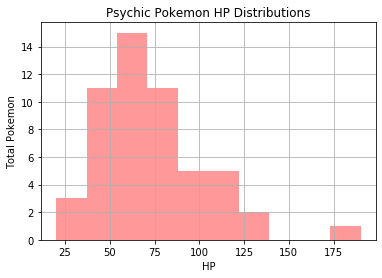

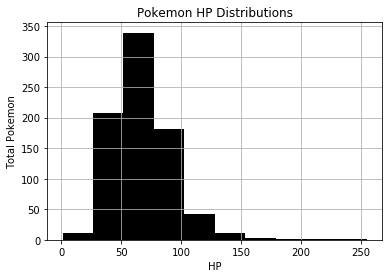

Attack Histograms


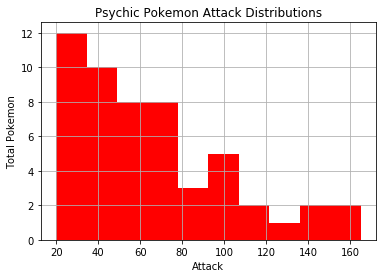

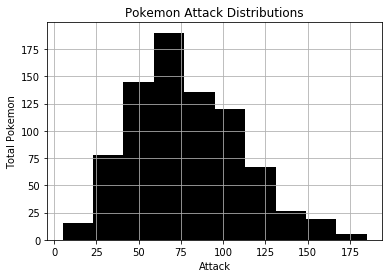

Defense Histograms


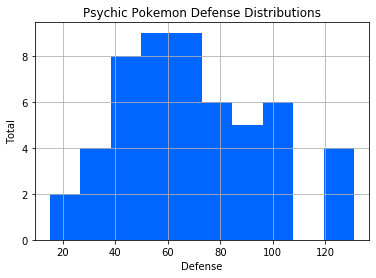

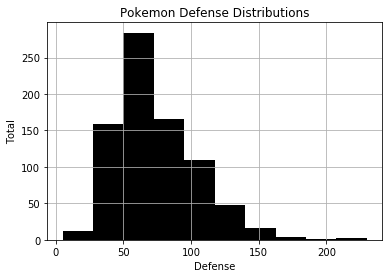

Special Attack Histograms


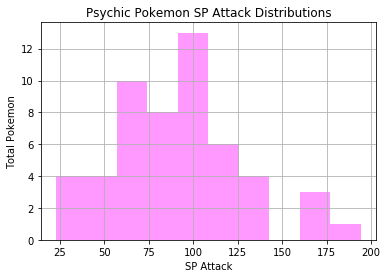

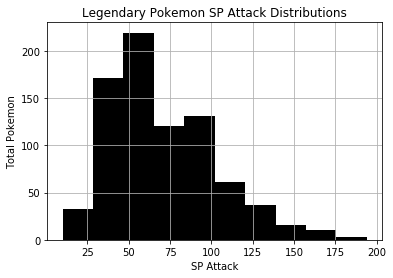

Special Defense Histograms


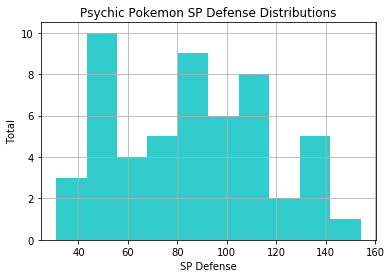

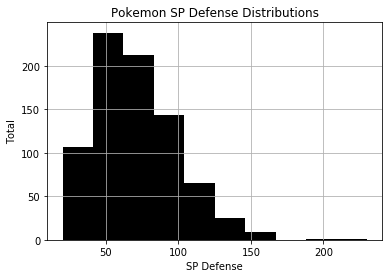

Speed Histograms


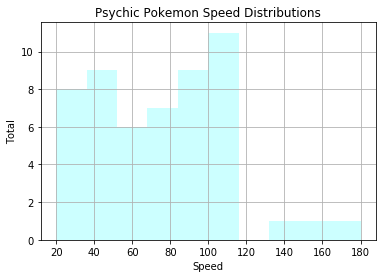

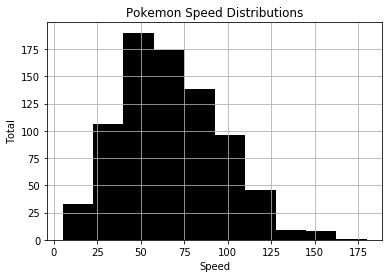

In [140]:
psychic = df[df['type1'] == 'psychic']

print("HP Histograms")
ax = plt.hist(psychic['hp'], color='#ff9999')
plt.ylabel("Total Pokemon")
plt.xlabel("HP")
plt.grid(True)
plt.title("Psychic Pokemon HP Distributions")
plt.show()
ax = plt.hist(df['hp'], color='#000000')
plt.ylabel("Total Pokemon")
plt.xlabel("HP")
plt.grid(True)
plt.title("Pokemon HP Distributions")
plt.show()

print("Attack Histograms")
ax = plt.hist(psychic['attack'], color='r')
plt.ylabel("Total Pokemon")
plt.xlabel("Attack")
plt.grid(True)
plt.title("Psychic Pokemon Attack Distributions")
plt.show()
ax = plt.hist(df['attack'], color='#000000')
plt.ylabel("Total Pokemon")
plt.xlabel("Attack")
plt.grid(True)
plt.title("Pokemon Attack Distributions")
plt.show()

print("Defense Histograms")
ax = plt.hist(psychic['defense'], color='#0066ff')
plt.ylabel("Total")
plt.xlabel("Defense")
plt.grid(True)
plt.title("Psychic Pokemon Defense Distributions")
plt.show()
ax = plt.hist(df['defense'], color='#000000')
plt.ylabel("Total")
plt.xlabel("Defense")
plt.grid(True)
plt.title("Pokemon Defense Distributions")
plt.show()

print("Special Attack Histograms")
ax = plt.hist(psychic['sp_attack'], color='#ff99ff')
plt.ylabel("Total Pokemon")
plt.xlabel("SP Attack")
plt.grid(True)
plt.title("Psychic Pokemon SP Attack Distributions")
plt.show()
ax = plt.hist(df['sp_attack'], color='#000000')
plt.ylabel("Total Pokemon")
plt.xlabel("SP Attack")
plt.grid(True)
plt.title("Legendary Pokemon SP Attack Distributions")
plt.show()

print("Special Defense Histograms")
ax = plt.hist(psychic['sp_defense'], color='#33cccc')
plt.ylabel("Total")
plt.xlabel("SP Defense")
plt.grid(True)
plt.title("Psychic Pokemon SP Defense Distributions")
plt.show()
ax = plt.hist(df['sp_defense'], color='#000000')
plt.ylabel("Total")
plt.xlabel("SP Defense")
plt.grid(True)
plt.title("Pokemon SP Defense Distributions")
plt.show()

print("Speed Histograms")
ax = plt.hist(psychic['speed'], color='#ccffff')
plt.ylabel("Total")
plt.xlabel("Speed")
plt.grid(True)
plt.title("Psychic Pokemon Speed Distributions")
plt.show()
ax = plt.hist(df['speed'], color='#000000')
plt.ylabel("Total")
plt.xlabel("Speed")
plt.grid(True)
plt.title("Pokemon Speed Distributions")
plt.show()

### Interpreting the above charts
We began creating these psychic specific histrograms to see if we could confidently guess if type had a major role in determining legendary status. Based on our earlier finding that most legendaries are psychic type we wanted to see if psychic pokemon had any stat advantages common to their type. The stats that show the most promise for being uniquely powerful in psychic pokemon are Speed, Special Defense and Special Attack. 

## Making a Prediction
Now that we have some more information about legendary pokemon we can try and make a prediction on what factors define a legendary pokemon. 

We have so far seen that on average, all fighting attributes for legendaries are higher than for regular pokemon. This makes it a little more difficult to recognize any specific ones that hold greater influence in the legendary classification. We then looked at the most common type that legendary pokemon come in which was psychic. We saw that psychic pokemon usually have higher SP Defense and SP Attack and Speed than all other pokemon. Using this information we can take a guess that the main characteristics that make up a legendary pokemon are SP Defense and SP Attack and Speed. This is what I predict will be the most influential features in the decision tree we create to guess if a pokemon is legendary.
 
 
## 4. Predict Key Characteristics before Random Forests
   ### 4.1 Null Hypothesis
According to our predictions made using Psychic Pokemon as a loose standard we have determined that the most likely contenders for defining characteristics of Legendary Pokemon is Special Attack, Special Defense, and Speed because they tend to dwarf other Pokemon on average in these categories and the majority of Legendaries are Psychic. Going of of this prediction we can say our Null Hypothesis is that their is no correlation between Legendary Status and the stats Special Attack, Special Defense, and Speed. 

## 5. Random Forests
   ### 5.1 Optimizing Hyperparameters
          When training most machine learning models one will have to tweak hyperparameters. Hyperparameters are like fine controls for a machine learning model and tweaking them can effect the accuracy of a model. For our Random Forests we will be tweaking the n_estimators and max_depth hyperparameters. n_estimators represent the number of trees in our random forest, max_depth represents the maximimm depth of a tree. 
          
We will be tweaking our hyperparamters using validation curves to tell which hyperparameter values will give us the most accurate results in our model. 

To do this we will split our data into a test set and a training set. We will then generate a validation curve for each hyperparamete which is basically a line plot showing us which hyperparameter value gave us the most successful tests.

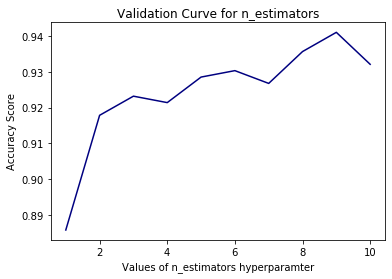

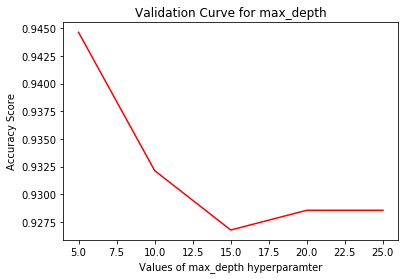

In [213]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import validation_curve
from sklearn import metrics
import warnings


X=df[['hp', 'attack', 'defense', 'sp_attack', 'sp_defense', 'speed']]
y=df['is_legendary']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

y_pred=model.predict(X_test)



    
param_range = [1,2,3,4,5,6,7,8,9,10]
train_scoreNum, test_scoreNum = validation_curve(
                                RandomForestClassifier(),
                                X = X_train, y = y_train, 
                                param_name = 'n_estimators', 
                                param_range = param_range, cv = 3)
plt.title("Validation Curve for n_estimators")
plt.xlabel("Values of n_estimators hyperparamter")
plt.ylabel("Accuracy Score")
train_scores_mean = np.mean(train_scoreNum, axis=1)
test_scores_mean = np.mean(test_scoreNum, axis=1)
accuract_scores = train_scoreNum / test_scoreNum
plt.plot(param_range, test_scores_mean, label="Cross-validation score",
             color="navy")
plt.show()

param_range = [5,10,15,20,25]
with warnings.catch_warnings():
    # ignore all caught warnings
    warnings.filterwarnings("ignore")
    train_scoreNum, test_scoreNum = validation_curve(
                                    RandomForestClassifier(),
                                    X = X_train, y = y_train, 
                                    param_name = 'max_depth', 
                                    param_range = param_range, cv = 3)

plt.title("Validation Curve for max_depth")
plt.xlabel("Values of max_depth hyperparamter")
plt.ylabel("Accuracy Score")
train_scores_mean = np.mean(train_scoreNum, axis=1)
test_scores_mean = np.mean(test_scoreNum, axis=1)
accuracy_scores = train_scoreNum / test_scoreNum
plt.plot(param_range, test_scores_mean, color="r")
plt.show()




### 5.2 Creating our RandomForest
       Based on our validation curves above we can see that a max-depth of 5 and n_estimators of 9 will give us the most accurate predictions in our model.  
   ### 5.3 Accuracy
       It would seem that our hyperparameter tweaking payed off because when we compare the results of our predicted values and actual values we get an accuracy score of 97% accuracy
   ### 5.4 Results
       Now that we have created our model we can look at which features have the largest splitting impact in our decision tree. When the feature importances are printed we see that features 3 and 0 have the highest. These two features refer to Special Attack and HP, the third highest feature refers to speed. This bodes well as our initial predictions had us guessing that Speed and Special Attack were among the biggest influences in Legendary Status. 

In [214]:

forest=RandomForestClassifier(random_state = 1, n_estimators=9,min_samples_split = 5, max_depth = 5)
model = forest.fit(X_train,y_train)


print("Accuracy:",metrics.accuracy_score(y_test, y_pred))


print("Feature ranking:")
importances = forest.feature_importances_
indices = np.argsort(importances)[::-1]

for f in range(X.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))
    

Accuracy: 0.975103734439834
Feature ranking:
1. feature 3 (0.260387)
2. feature 0 (0.212558)
3. feature 5 (0.181191)
4. feature 2 (0.160190)
5. feature 1 (0.100716)
6. feature 4 (0.084959)


## 6. Conclusion
### 6.1 Key Characteristics
    Based on our calcualted feature importances in our Random Forests Classifier, HP, Special Attack, and Speed are the defining characteristics of a Legendary Pokemon
### 6.2 Concluding Thoughts
    I found this project personally enjoyable and a good introduction to Decision Trees and Random Forest models. I believe that anyone who is new to machine learning would find this project exceptionally usefule and informative were they to give it a shot on their own. One thing I would have liked to improve while doing this project however would be decreasign the abstraction of my code. I just think that it would be better to understand what is going on behind the scenes o\if this project did not rely so heavily on prebuilt tools. It is definitely easier to follow thanks to the abstraction but I question whether less motivated readers would gain anything out of simply reading over functions names versus knowing what each function does on a lower more nuanced level. As stated earlier though, this is a fair introduction into Decision Trees and we were able to answer a Classification question thanks to the power of machine learning. 